In [1]:
%matplotlib inline
import csv
import math
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pylab import hist2d

In [2]:
import matplotlib as mpl

cmapp = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['blue','red'],256)
cmapp._init()
alphas = np.linspace(0, 0.8, cmapp.N+3)
cmapp._lut[:,-1] = alphas

In [12]:
def approximate_moon_visibility(current_date):
    days_per_synodic_month = 29.530588853 # change this if the moon gets towed away
    days_since_known_new_moon = (current_date - datetime.datetime(2000, 12, 25)).days
    phase_fraction = (days_since_known_new_moon % days_per_synodic_month) / days_per_synodic_month
    return phase_fraction 

In [17]:
datX = []
datL = []
with open('input/crimes.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for dat in reader:
        try:
            tim = datetime.datetime.strptime(dat[2], "%m/%d/%Y %I:%M:%S %p")
            lat = float(dat[19])
            lng = float(dat[20])
            datX.append([lat,lng,tim.hour,tim.weekday(),tim.month,approximate_moon_visibility(tim)])
            datL.append([dat[5],dat[7]])
        except:
            pass
X = np.array(datX);
L = np.array(datL);

In [18]:
L[np.char.find(L[:,1],'AIR')>=0,1]='AIRPORT'
L[np.char.find(L[:,0],'NON')>=0,0]='NON-CRIMINAL'
L[np.char.find(L[:,1],'CTA')>=0,1]='CTA'

keep = np.logical_or(np.char.find(L[:,1],'STREET')>=0,np.logical_or(np.char.find(L[:,1],'SIDEWALK')>=0,np.logical_or(L[:,1]=='OTHER',np.logical_or(np.char.find(L[:,1],'LOT/GARAGE')>=0,np.logical_or(L[:,1]=='ALLEY',np.char.find(L[:,1],'CTA')>=0)))))
keep = np.logical_and(keep, np.logical_not(np.logical_or(np.char.find(L[:,0],'ARSON')>=0,np.logical_or(np.char.find(L[:,0],'CARRY')>=0,np.logical_or(np.char.find(L[:,0],'HUMAN')>=0,np.logical_or(np.char.find(L[:,0],'INDECENCY')>=0,np.logical_or(np.char.find(L[:,0],'LIQUOR')>=0,np.logical_or(np.char.find(L[:,0],'GAMBLING')>=0,np.logical_or(np.char.find(L[:,0],'PROSTITUTION')>=0,np.logical_or(np.char.find(L[:,0],'STALKING')>=0,np.logical_or(np.char.find(L[:,0],'KIDNAPPING')>=0,np.logical_or(np.char.find(L[:,0],'INTIMIDATION')>=0,np.logical_or(np.char.find(L[:,0],'OBSCENITY')>=0,np.char.find(L[:,0],'NARCOTICS')>=0)))))))))))))
L=L[keep,:]
X=X[keep,:]

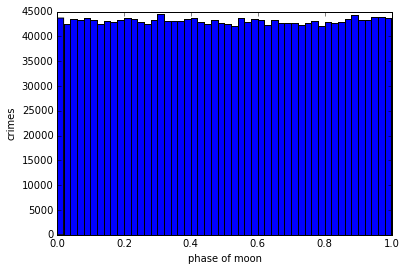

In [23]:
plt.figure()
plt.hist(X[:,5],bins=50);
plt.ylabel('crime count')
plt.xlabel('phase of moon')

<matplotlib.colorbar.Colorbar instance at 0x7fc0e4b5bcb0>

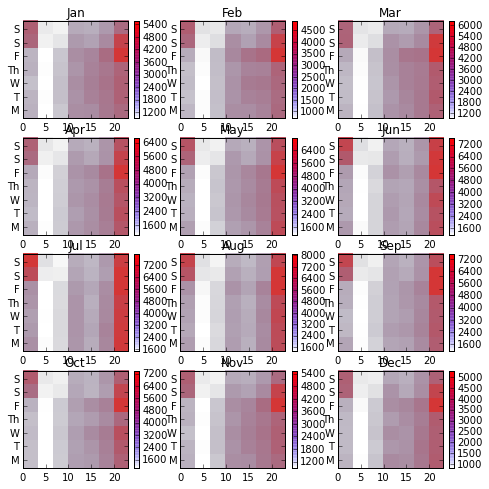

In [26]:
plt.figure(figsize=(8,8))
subind = X[:,4]==1
plt.subplot(431)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Jan")
plt.colorbar()

subind = X[:,4]==2
plt.subplot(432)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Feb")
plt.colorbar()

subind = X[:,4]==3
plt.subplot(433)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Mar")
plt.colorbar()

subind = X[:,4]==4
plt.subplot(434)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Apr")
plt.colorbar()

subind = X[:,4]==5
plt.subplot(435)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("May")
plt.colorbar()

subind = X[:,4]==6
plt.subplot(436)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Jun")
plt.colorbar()

subind = X[:,4]==7
plt.subplot(437)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Jul")
plt.colorbar()

subind = X[:,4]==8
plt.subplot(438)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Aug")
plt.colorbar()

subind = X[:,4]==9
plt.subplot(439)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Sep")
plt.colorbar()

subind = X[:,4]==10
plt.subplot(4,3,10)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Oct")
plt.colorbar()

subind = X[:,4]==1
plt.subplot(4,3,11)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Nov")
plt.colorbar()

subind = X[:,4]==12
plt.subplot(4,3,12)
hist2d(X[subind,2],X[subind,3],bins=7, cmap=cmapp);
plt.yticks(np.linspace(0,5,7)+0.5, ['M','T','W','Th','F','S','S']);
plt.title("Dec")
plt.colorbar()
